In [1]:
import pickle  # importing pickle to data retrieval
from sklearn.model_selection import train_test_split # for train splits
import numpy as np #operations on data
from sklearn.preprocessing import PolynomialFeatures #For creating powers of features
from sklearn.linear_model import LinearRegression # for fiting the desired train data and predicting the model
import matplotlib.pyplot as plt # for graph

testfile = open("../data/test.pkl", 'rb')  # retrieving testfile
trainfile = open("../data/train.pkl", 'rb')  # retrieving trainfile
# get data from FILE
testdata = pickle.load(testfile)
traindata = pickle.load(trainfile)
# closing files
testfile.close()
trainfile.close()

trainsplits = []  # contains 10 testdata split instances each is a numpy array
trainsplitsX = []  # contains 10 datasplits X's list
trainsplitsY = []  # contains 10 datasplits Y's list
predicted_test = []  # contains 200 elements predicted_test[10*p + m] contain predicted Y of 80 points
testsplited = np.hsplit(testdata, 2)
testX = testsplited[0]
testY = testsplited[1]
dummy = traindata
for i in range(10):
    if(i != 9):
        X, Y = train_test_split(dummy, train_size=int(traindata.shape[0]/10))
        trainsplits.append(X)
        dummy = Y
    else:
        trainsplits.append(dummy)

# print(type(testdata))
# print(type(traindata))
##############process#####################
# loop 20 times each iteration represents a linear polyomial
# each polynomial should have 10 models each model for each train set
# prepare 10 models
# iterate through 10 models
# test each mdoel with test data and store the value predicted for test data

# find 200 prections of test set and find mean variance and mean bias according to the data


for nparray in trainsplits:
    splited = np.hsplit(nparray, 2)
    trainsplitsX.append(splited[0])
    trainsplitsY.append(splited[1])

for p in range(20):
    for m in range(10):
        poly = PolynomialFeatures(p+1)
        transformed = poly.fit_transform(trainsplitsX[m])  # contains  (800,1+p)
        tobefited = trainsplitsY[m]
        reg = LinearRegression().fit(transformed, tobefited)
        featurted_test_X = poly.fit_transform(testX)
        predictedY = reg.predict(featurted_test_X)
        # 10p+m contains prectedY of traindata of mth model
        predicted_test.append(predictedY)


# final_variance = np.mean(np.var(predicted_test, axis=0))
# print(final_variance)
# print(np.array(predicted_test).shape)
final_variances = []
final_bias = []
final_bias2 = []
MSE = []
IRE = []
for p in range(20):
    lp = predicted_test[10*p: 10*(p+1)]
    final_variances.append(np.mean(np.var(lp, axis=0)))
    bias = np.mean(lp, axis=0) - testY
    bias = np.sqrt(np.square(bias))
    final_bias.append(np.mean(bias))
    final_bias2.append(np.mean(np.square(bias)))
    MSE.append(np.mean(np.mean(np.square(testY-lp), axis=0)))
    IRE.append(MSE[p]-(final_bias2[p] + final_variances[p]))
    #print(str(p+1) + "\t" + str(final_bias[p]) + "\t" + "\t" + str(
     #   final_variances[p]) + "\t" + str(MSE[p]) + "\t" + str(IRE[p]))


polies = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
          11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
data = {
    "Dg" : polies,
    "  Bias   " : final_bias,
    "  Varaince" : final_variances,
    "Mean SQ ERROR" : MSE,
    "Irreducible Error" : IRE
}
import pandas as pd # importing pands for table
table = pd.DataFrame(data)
print(table.to_string(index=False))
print("____________________________________________________________________________")

data = {
    "Degree" : polies,
    "Irreducible Error" : IRE
}

table = pd.DataFrame(data)
print(table.to_string(index=False))



FileNotFoundError: [Errno 2] No such file or directory: './data/test.pkl'

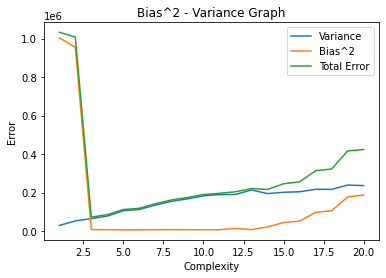

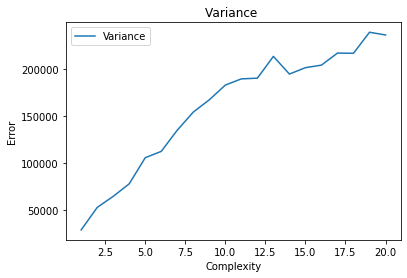

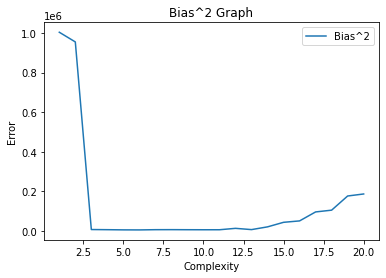

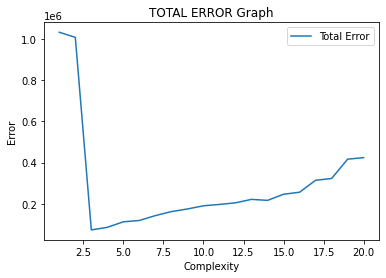

In [20]:
# graph plotting
import matplotlib.pyplot as plt
polies = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
          11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

plt.figure(1)
plt.plot(polies, final_variances, label="Variance")
plt.plot(polies, final_bias2, label="Bias^2")
plt.plot(polies, MSE, label="Total Error")
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title("Bias^2 - Variance Graph")
plt.legend()

plt.figure(2)
plt.plot(polies, final_variances, label="Variance")
#plt.plot(polies, final_bias2, label="Bias^2")
#plt.plot(polies, MSE, label="Total Error")
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title("Variance ")
plt.legend()

plt.figure(3)
#plt.plot(polies, final_variances, label="Variance")
plt.plot(polies, final_bias2, label="Bias^2")
#plt.plot(polies, MSE, label="Total Error")
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title("Bias^2 Graph")
plt.legend()

plt.figure(4)
#plt.plot(polies, final_variances, label="Variance")
#plt.plot(polies, final_bias2, label="Bias^2")
plt.plot(polies, MSE, label="Total Error")
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title("TOTAL ERROR Graph")
plt.legend()


plt.show()

# newlist = trainsplits[0]
# for i in range(9):
#     newlist = np.append(newlist, trainsplits[i+1], 0)

# for i in range(8000):
#     print(str(traindata[i][0]) + " , " + str(newlist[i][0]))